# Módulo 6 tarefa 3

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esse arquivo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
sinasc = pd.read_csv('SINASC_RO_2019 - cópia 3.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


#### 2) Categorize a variável APGAR5 conforme as seguintes quebras:

- 0 a 3: 'asfixia grave'
- 4 a 5: 'asfixia moderada'
- 6 a 7: 'asfixia leve'
- 8 a 10: 'normal'

In [6]:
#Vou conferir se as nan nas variaves de APGAR5
sinasc['APGAR5'].isna().sum()

103

In [7]:
#Agora vou limpar as linhas aonde este dado está como nulo
sinasc = sinasc.dropna(subset=['APGAR5'])

In [8]:
#Conferindo se os dados nan foram apagados
sinasc['APGAR5'].isna().sum()

0

In [9]:
sinasc.loc[(sinasc['APGAR5'] >= 8) & (sinasc['APGAR5'] <= 10), 'apgar5_cat'] = 'normal'
sinasc.loc[(sinasc['APGAR5'] >= 6) & (sinasc['APGAR5'] <= 7), 'apgar5_cat'] = 'asfixis leve'
sinasc.loc[(sinasc['APGAR5'] >= 4) & (sinasc['APGAR5'] <= 5), 'apgar5_cat'] = 'asfixia moderada'
sinasc.loc[(sinasc['APGAR5'] >= 0) & (sinasc['APGAR5'] <= 3), 'apgar5_cat'] = 'asfixia grave'

In [16]:
sinasc.apgar5_cat.value_counts()

apgar5_cat
normal              26463
asfixis leve          320
asfixia grave          74
asfixia moderada       68
Name: count, dtype: int64

#### 3) Monte um gráfico comparando a distribuição de APGAR5 por sexo para cada grupo de tempo de gestação (GESTACAO).

<Axes: xlabel='GESTACAO', ylabel='APGAR5'>

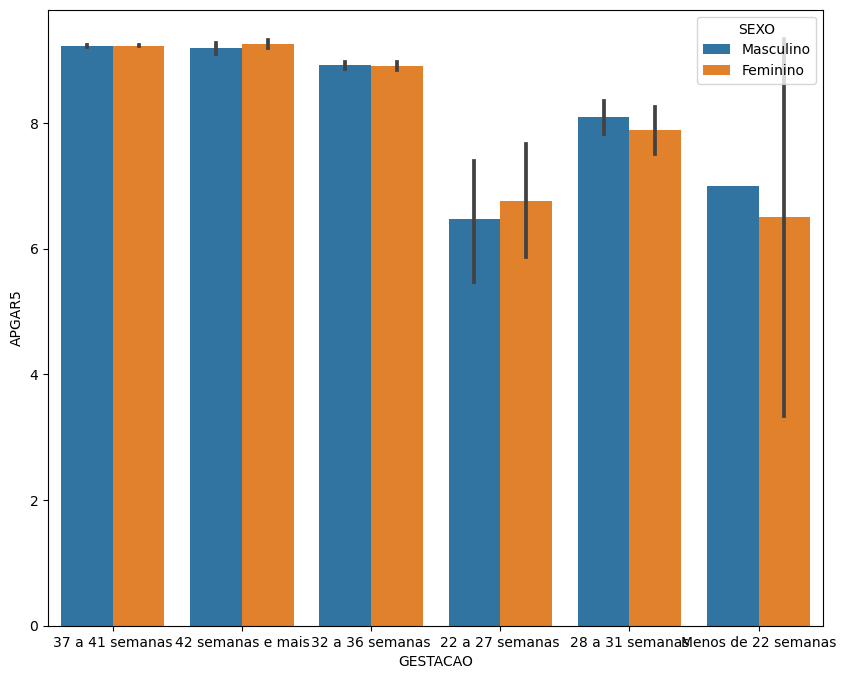

In [34]:
sns.barplot(x='GESTACAO', y='APGAR5', hue='SEXO', data=sinasc)

####  4) Monte uma tabela cruzada com APGAR5 nas colunas e GESTACAO nas linhas

In [36]:
tabela_cruzada = pd.crosstab(sinasc['GESTACAO'], sinasc['apgar5_cat'])
tabela_cruzada

apgar5_cat,asfixia grave,asfixia moderada,asfixis leve,normal
GESTACAO,,,,
22 a 27 semanas,21,1,12,51
28 a 31 semanas,3,12,18,129
32 a 36 semanas,8,19,73,2134
37 a 41 semanas,33,28,196,22266
42 semanas e mais,1,1,6,690
Menos de 22 semanas,2,0,1,4


####  5) Da tabela cruzada do intem anterior, calcule os percentuais de linha. Ou seja, a distribuição da variável APGAR5 para cada classe de GESTACAO dado.

In [38]:
pct_tabela_cruzada = round(tabela_cruzada.apply(lambda r: r/r.sum(), axis=1) * 100, 2)
pct_tabela_cruzada

apgar5_cat,asfixia grave,asfixia moderada,asfixis leve,normal
GESTACAO,,,,
22 a 27 semanas,24.71,1.18,14.12,60.00
28 a 31 semanas,1.85,7.41,11.11,79.63
32 a 36 semanas,0.36,0.85,3.27,95.52
37 a 41 semanas,0.15,0.12,0.87,98.86
42 semanas e mais,0.14,0.14,0.86,98.85
Menos de 22 semanas,28.57,0.00,14.29,57.14


####  6) Os médicos costumam classificar parto prematuro quando a gestação tem menos que 37 semanas. Faça um gráfico de barras da tabela cruzada acima e conclua se você acha que este conjunto de dados corrobora ou não com a afirmação dos médicos.

<Axes: xlabel='GESTACAO'>

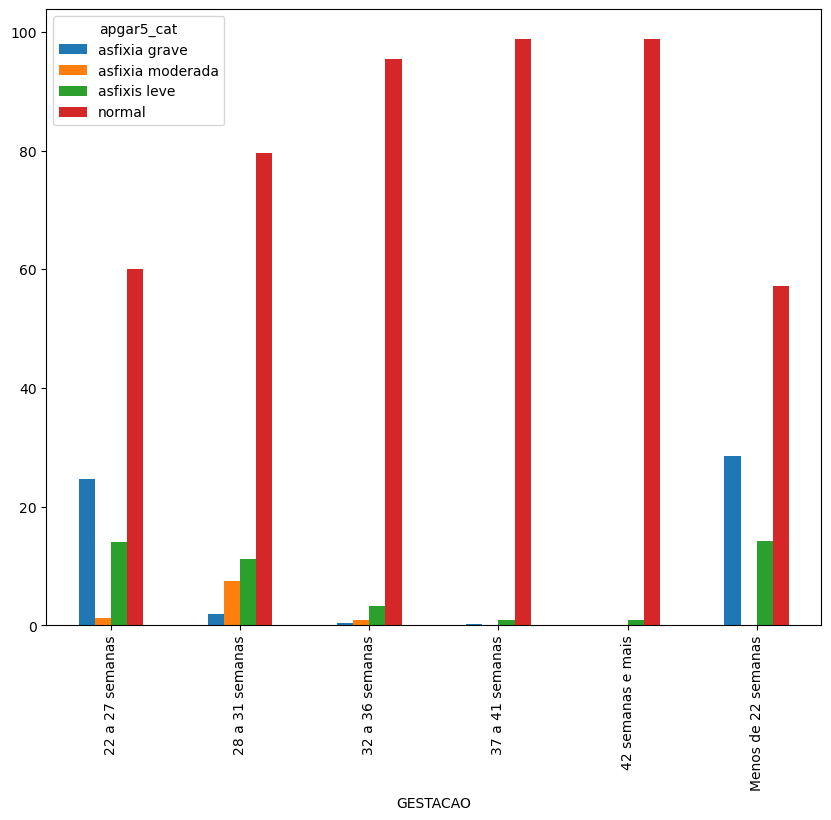

In [42]:
pct_tabela_cruzada.plot.bar()

de 22 a 27 semanas e de menos de 22 semanas temos os maiores indices de ocorencia de asfixia grave e leve nos bebês considerados prematuros oq nos leva a afirmar que os bebês nesta condição de gestacao antes das 37 semanas estão mais expostos ao risco de algum nível de asfixia, acima de 32 semanas temos uma diminuição nas barras de asfixia assegurando que o nascimento do bebê é completamente mais seguro

#### 7) Veja se há relação entre APGAR5 e o peso do bebê. Isso pode ser feito de diversas formas. Fique à vontade para escolher a melhor maneira na sua opinião, ou até testar mais de um dos gráficos que vimos. Fique à vontade também para consultar a documentação e utilizar algum outro recurso se achar conveniente.

<Axes: xlabel='APGAR5', ylabel='PESO'>

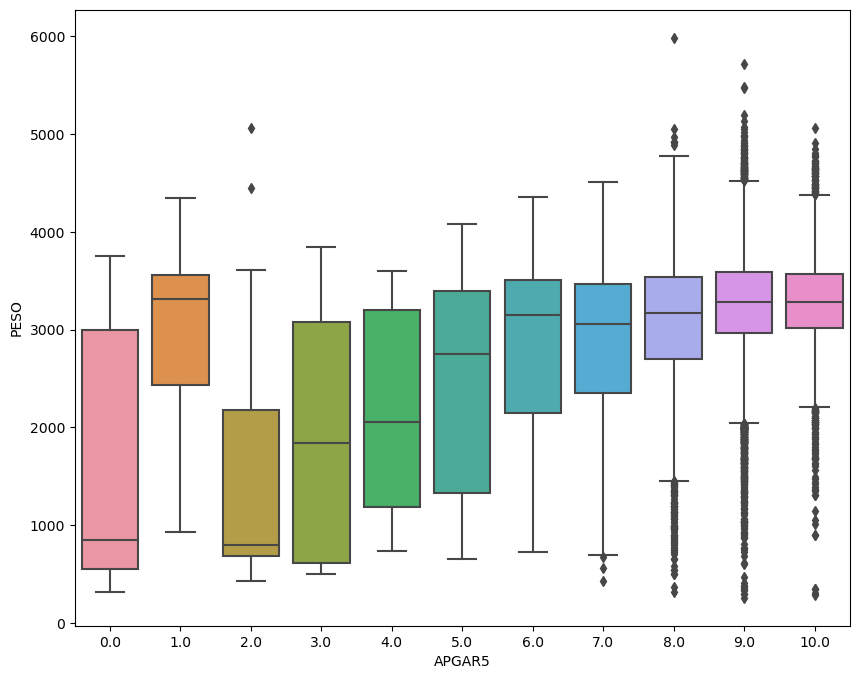

In [43]:
# gerando um boxplot para a visualização do gráfico
sns.boxplot(x='APGAR5', y='PESO', data=sinasc)

<Axes: xlabel='APGAR5', ylabel='PESO'>

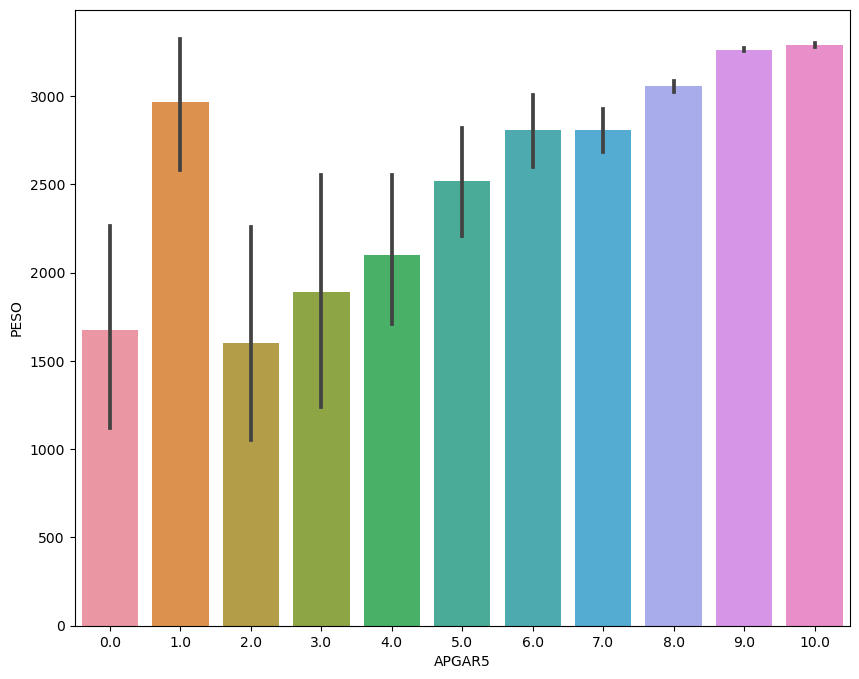

In [59]:
#agora um barplot
sns.barplot(x='APGAR5', y='PESO', data=sinasc)

Sem sucesso com a visualização destes dos gráficos vamos tentar cruzar suas tabelas

In [52]:
sinasc.loc[(sinasc['PESO'] >= 5000) & (sinasc['PESO'] < 6000), 'peso_cat'] = '5 quilos ou mais'
sinasc.loc[(sinasc['PESO'] >= 4000) & (sinasc['PESO'] < 5000), 'peso_cat'] = '4 quilos ou mais'
sinasc.loc[(sinasc['PESO'] >= 3000) & (sinasc['PESO'] < 4000), 'peso_cat'] = '3 quilos ou mais'
sinasc.loc[(sinasc['PESO'] >= 2000) & (sinasc['PESO'] < 3000), 'peso_cat'] = '2 quilos ou mais'
sinasc.loc[(sinasc['PESO'] >= 1000) & (sinasc['PESO'] < 2000), 'peso_cat'] = '1 quilo ou mais'
sinasc.loc[sinasc['PESO'] < 1000, 'peso_cat'] = 'menos de 1 quilo'

In [53]:
sinasc.peso_cat.value_counts()

peso_cat
3 quilos ou mais    18066
2 quilos ou mais     6594
4 quilos ou mais     1586
1 quilo ou mais       536
menos de 1 quilo      131
5 quilos ou mais       12
Name: count, dtype: int64

In [56]:
tabela_cruzada_2 = pd.crosstab(sinasc['peso_cat'], sinasc['apgar5_cat'])
tabela_cruzada_2

apgar5_cat,asfixia grave,asfixia moderada,asfixis leve,normal
peso_cat,,,,
1 quilo ou mais,10,15,39,472
2 quilos ou mais,12,17,88,6477
3 quilos ou mais,22,25,159,17860
4 quilos ou mais,3,1,12,1570
5 quilos ou mais,1,0,0,11
menos de 1 quilo,26,10,22,73


In [57]:
pct_tabela_cruzada_2 = round(tabela_cruzada_2.apply(lambda r: r/r.sum(), axis=1) * 100, 2)
pct_tabela_cruzada_2

apgar5_cat,asfixia grave,asfixia moderada,asfixis leve,normal
peso_cat,,,,
1 quilo ou mais,1.87,2.80,7.28,88.06
2 quilos ou mais,0.18,0.26,1.33,98.23
3 quilos ou mais,0.12,0.14,0.88,98.86
4 quilos ou mais,0.19,0.06,0.76,98.99
5 quilos ou mais,8.33,0.00,0.00,91.67
menos de 1 quilo,19.85,7.63,16.79,55.73


com está tabela cruzada percebemos que a porcentagem dos bebes abaixo de um kg que sofreram com algum tipo de asfixia é alta, há também um nivel alto de bebes de 1 kg ou mais que sofreram de asfixia leve!

<Axes: xlabel='peso_cat'>

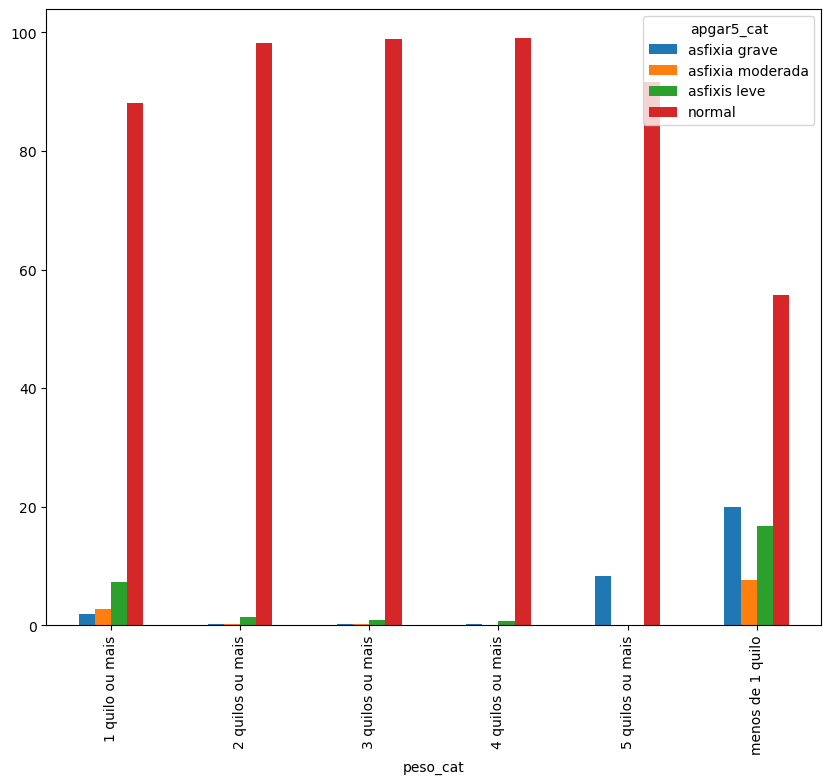

In [58]:
pct_tabela_cruzada_2.plot.bar()